# Assignment Math Foundations Machine Learning
## David Alvear 187594

# 3. Clustering Iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'petal_length')

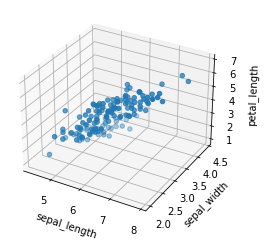

In [2]:
# you may want to write your kmeans routine separately (in a kmeans.py file) and import it here
# from kmeans import kmeans

# read the iris data
df = pd.read_csv('data/iris.csv')
feature_names = df.keys()
X = df.iloc[:, 0:4].to_numpy()

# 3d scatter plot of training vectors
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:,1], X[:,2])
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])

In [3]:
###################################
######### K-means #################
###################################

class kmeans:
    def __init__(self, x, k, maxiters = 30, tol = 1e-4):
        self.maxiters = maxiters
        self.tol = tol
        self.x = x
        self.k = k
    
    def clustering(self):
        N, d = self.x.shape
        distances = np.zeros(N) 
        initial = np.random.choice(N, self.k, replace=False) # select random initial 
        reps = self.x[initial, :] # Get the representatives from x
        assignment = np.zeros(N, dtype = np.int32) # to store the groupd
        Jprev = np.infty
        J_list = []
        for iter in range(self.maxiters):
            # Find distance to neares representative and group index
            for i in range(N):
                ci = np.argmin([np.linalg.norm(self.x[i] - reps[j]) for j in range(self.k)])
                assignment[i] = ci
                distances[i] = np.linalg.norm(self.x[i] - reps[ci])
                
            # cluster j representative
            for j in range(self.k):
                group = [i for i in range(N) if assignment[i] == j]
                reps[j] = np.sum(self.x[group], axis=0) / len(group)
                
            # compute clustering objective
            J = np.linalg.norm(distances) ** 2 /N
            
            # convergence
            if (iter > self.maxiters) or (np.abs(J - Jprev) < self.tol*J):
                break
            Jprev = J
            J_list.append(J) # Store the J value
        
        return Jprev, assignment, reps, J_list # return J, assignments of x, representatives
    
    def iterative_clustering(self, run_budget):
        # perform k-means multiple times
        kmeans_results = []
        best_J = np.infty
        index_kmeans = 0
        for i in range(run_budget):
            run = self.clustering() # J, assignment, rep
            kmeans_results.append(run)
            # check if model is better
            if run[0] < best_J: # if new J is better than last best
                best_J = run[0]
                index_kmeans = i # Get the index of the best model so far
        # store best model
        self.result_best_kmeans = kmeans_results[index_kmeans]
        return pd.DataFrame(kmeans_results) # list of runs


In [4]:
# YOUR CODE GOES HERE

# You should cluster the data to get an assignmemt of the training vectors to group IDs
# add an argument ``c = avec'' to scatter to color the groups differently. avec is the assignment
# that your clustering generated

# initialize kmeans model
kmeans_model = kmeans(X, 3)
results_iris = kmeans_model.iterative_clustering(run_budget=10)
print(f"Best Result index:{np.argmin(results_iris[0].to_numpy())}")

Best Result index:1


In [5]:
results_iris.head()

,0,1,2,3
0,0.526300,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[[5.88360655737705, 2.740983606557377, 4.38852...","[0.6477333333333333, 0.5358393551117687, 0.531..."
1,0.526272,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[5.005999999999999, 3.4180000000000006, 1.464...","[7.638533333333331, 2.217431598340041, 1.11275..."
2,0.952344,"[2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, ...","[[4.739130434782608, 2.9347826086956528, 1.760...","[1.3606000000000005, 0.9536636311961869, 0.952..."
3,0.526300,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[5.005999999999999, 3.4180000000000006, 1.464...","[4.0709333333333335, 0.9609482485972016, 0.541..."
4,0.526272,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[[5.901612903225807, 2.748387096774194, 4.3935...","[1.0390666666666666, 0.8939518685979292, 0.584..."


In [6]:
best_result = kmeans_model.result_best_kmeans
best_result

(0.5262722761743067,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32),
 array([[5.006     , 3.418     , 1.464     , 0.244     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]]),
 [7.638533333333331,
  2.217431598340041,
  1.1127514132448049,
  0.6915814539447749,
  0.5866133656277982,
  0.5348703292870371,
  0.528576950931852,
  0.5262722761743067])

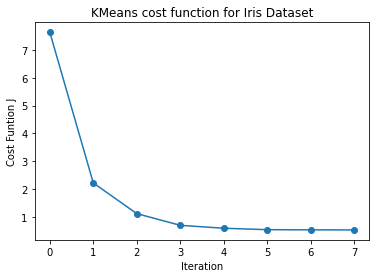

In [8]:
# plot cost function vs iteration
plt.plot(best_result[3], marker='o')
plt.title("KMeans cost function for Iris Dataset")
plt.ylabel('Cost Funtion J')
plt.xlabel('Iteration')
plt.show()

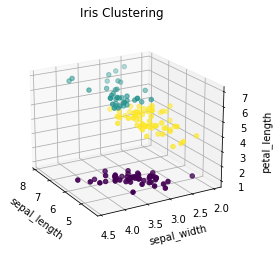

In [9]:
# plot 3d clustering for iris dataset
plt.figure()
ax = plt.axes(projection='3d')
plt.title("Iris Clustering")
ax.scatter(X[:, 0], X[:,1], X[:,2], c = best_result[1])
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1]) 
ax.set_zlabel(feature_names[2])
ax.view_init(elev=20., azim=150)

# 4. Classification from clustering

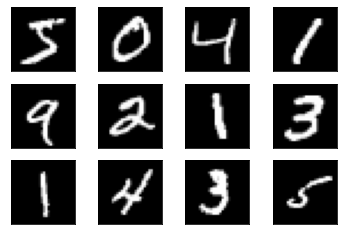

In [11]:
# read MNIST training data
df = pd.read_csv('data/mnist_train.csv')
data = df.iloc[:, 1:].to_numpy() / 255.0       # values are scaled to be between 0 and 1
labels = df.iloc[:, 0].to_numpy()                # labels of images

# plot the first dozen images from the data set
plt.figure()
for i in range(12):
    plt.subplot(3, 4, i+1, xticks=[], yticks=[])
    image = data[i, :].reshape((28,28))
    plt.imshow(image, cmap='gray')

In [13]:
# YOUR CODE GOES HERE
kmeans_mnist = kmeans(data, k=20, maxiters=11)
result_kmeans = kmeans_mnist.iterative_clustering(run_budget=10)
best_mnist_kmeans = kmeans_mnist.result_best_kmeans

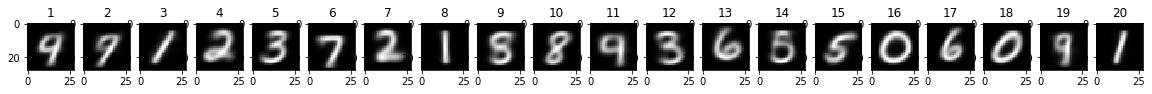

In [15]:
# Display representative values
def display_reps(kmeans_model:kmeans):
    best_reps = kmeans_model.result_best_kmeans[2]
    fig, axs = plt.subplots(1, kmeans_model.k, figsize=(20, 20))

    for i in range(kmeans_model.k):
        grid_data = best_reps[i].reshape(28, 28)
        axs[i].imshow(grid_data, interpolation="none", cmap="gray")
        axs[i].set_title(str(i+1))

    plt.show()

display_reps(kmeans_mnist)

In [16]:
result_kmeans.head()

,0,1,2,3
0,35.499488,"[1, 11, 7, 3, 9, 14, 17, 10, 17, 19, 10, 19, 5...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[60.818446891195684, 37.5727175047822, 36.6138..."
1,35.587770,"[14, 8, 18, 2, 12, 17, 10, 14, 10, 5, 14, 2, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[64.97336467563755, 38.33401961022575, 36.9011..."
2,35.502698,"[9, 14, 2, 8, 17, 11, 4, 9, 4, 6, 9, 8, 5, 16,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[63.55537307984109, 37.93706843693447, 36.4649..."
3,35.630681,"[10, 13, 15, 2, 6, 0, 14, 12, 14, 1, 12, 2, 7,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[61.135295047802146, 39.082376551638006, 37.69..."
4,35.370652,"[4, 17, 10, 2, 0, 3, 7, 4, 7, 1, 4, 2, 11, 12,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[61.03660079405357, 38.6835667741583, 36.79395..."


In [17]:
# Labeling
labels_rep = [9,9,1,2,3,7,2,1,8,8,9,3,6,5,5,0,6,0,9,1] # int, np.int64
sample_labels = [labels_rep[best_mnist_kmeans[1][i]] for i in range(len(best_mnist_kmeans))]

In [32]:
def classify(test_data, kmeans_model, k):
    N_test = test_data.shape[0]
    test_assignments = np.zeros(N_test, dtype=np.int32)
    test_distances = np.zeros(N_test)

    # Get the best representatives from the best K-means run
    best_reps = kmeans_model.result_best_kmeans[2] # Get the best representatives

    for i in range(N_test):
        # Find the nearest centroid for each data point in test_data
        ci = np.argmin([np.linalg.norm(test_data[i] - best_reps[j]) for j in range(k)])
        test_assignments[i] = ci
        test_distances[i] = np.linalg.norm(test_data[i] - best_reps[ci])

    return test_assignments, test_distances


In [34]:
# Evaluate in the test data
# Read and preprocess the test data
df = pd.read_csv("data/mnist_test.csv")
test_data = df.iloc[:, 1:].to_numpy() / 255.0       # values are scaled to be between 0 and 1
test_labels = df.iloc[:, 0].to_numpy()    

# Predict
test_assign, test_distances = classify(test_data, kmeans_mnist, 20)

In [47]:
result_labels = np.array([labels_rep[test_assign[i]] for i in range(len(test_assign))]).astype(np.int64)
print(f"result_labels: {result_labels[:10]}")
print(f"labels: {test_labels[:10]}")

result_labels: [7 2 1 0 9 1 9 9 9 9]
labels: [7 2 1 0 4 1 4 9 5 9]


In [51]:
acc_test = np.mean(test_labels == result_labels)
print(f"Test Accuracy: {acc_test}")

Test Accuracy: 0.6781
